In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [100]:
data = pd.read_csv('Cleaned_Hospitals_v7.csv')

In [41]:
data

,Unnamed: 0,Hospital name,City,County,Acute Care Beds,YearFounded,Affiliation,Notes,Place ID,Hospital Latitude,...,Street Address,State,Hospital Zip Code,Full Address,City Zip Code,City Latitude,City Longtitude,Median Income,Population,Joined
0,0,AdventHealth Gordon,Calhoun,Gordon County,69,NaN,AdventHealth,Formerly Gordon Hospital,ChIJfVjpjer9X4gRGK7NwGG_tbg,34.510205,...,1035 Red Bud Road Northeast,Georgia,30701.0,"1035 Red Bud Rd NE, Calhoun, GA 30701, USA",30702.0,34.487833,-84.850071,24110,40820,False
1,1,AdventHealth Murray,Chatsworth,Murray County,29,NaN,AdventHealth,Formerly Murray Medical Center,ChIJ-U0scjndX4gRG-FoXnNaHI4,34.779956,...,707 Old Dalton Ellijay Road,Georgia,30705.0,"707 Old Dalton Ellijay Rd, Chatsworth, GA 3070...",30705.0,34.753129,-84.775020,24457,33460,False
2,2,Archbold Memorial Hospital,Thomasville,Thomas County,264,1925,Archbold,NaN,ChIJsxblg8q17YgR8XXHSBDuObQ,30.825169,...,915 Gordon Avenue,Georgia,31792.0,"915 Gordon Ave, Thomasville, GA 31792, USA",31776.5,30.862504,-83.928812,22498,20703,False
3,3,Archbold - Brooks County Hospital,Quitman,Brooks County,25,NaN,Archbold,NaN,ChIJiyuklBp_7ogRmoGX5XNztMM,30.795039,...,903 North Court Street,Georgia,31643.0,"903 N Court St, Quitman, GA 31643, USA",31643.0,30.783639,-83.553430,24644,9062,False
4,5,Archbold - Mitchell County Hospital,Camilla,Mitchell County,25,NaN,Archbold,NaN,ChIJswuXyhic7YgRuk38qsPrYt4,31.229773,...,90 East Stephens Street,Georgia,31730.0,"90 E Stephens St, Camilla, GA 31730, USA",31730.0,31.209854,-84.236670,21584,8419,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,657,NaN,Wrens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30833.0,33.200325,-82.376250,18634,3065,False
613,658,NaN,Wrightsville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31096.0,32.717320,-82.689260,20232,7046,False
614,659,NaN,Yatesville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31097.0,32.912207,-84.148120,27000,1656,False
615,660,NaN,Young Harris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30582.0,34.954638,-83.864840,15867,5038,False


In [102]:


pltdata = data[['City','Population','Median Income','Acute Care Beds']]
cityagg = data.groupby('City')
pltdata = pltdata.merge(pd.DataFrame(cityagg.nunique()['Hospital name']), on = 'City', how = 'left').rename(columns = {'Hospital name':'HospitalCount'})

pltdata =  pltdata.loc[pltdata['Median Income'] > 0]
pltdata.head()

,City,Population,Median Income,Acute Care Beds,HospitalCount
0,Calhoun,40820,24110,69,1
1,Chatsworth,33460,24457,29,1
2,Thomasville,20703,22498,264,1
3,Quitman,9062,24644,25,1
4,Camilla,8419,21584,25,1


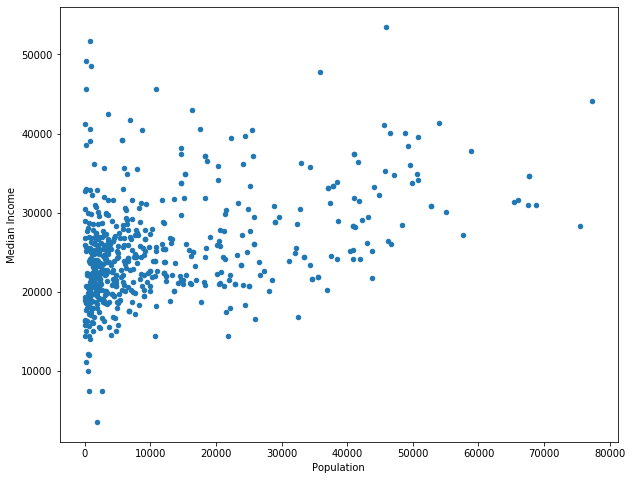

In [40]:
pltdata.plot(kind = 'scatter', x = 'Population',y = 'Median Income', figsize = (10,8))

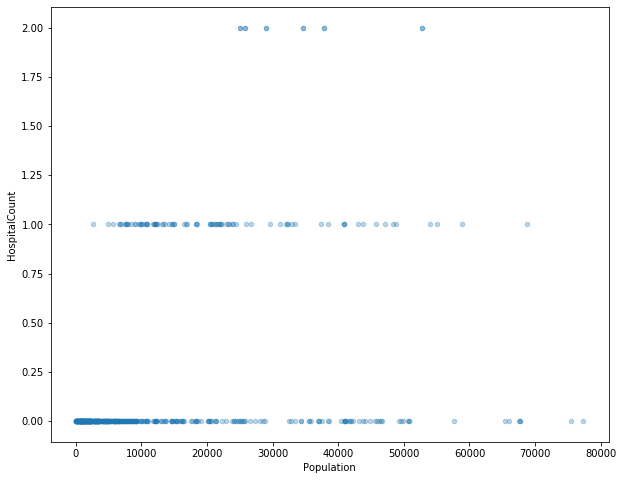

In [103]:

pltdata.plot(kind = 'scatter', x = 'Population',y = 'HospitalCount', figsize = (10,8), alpha = .3)


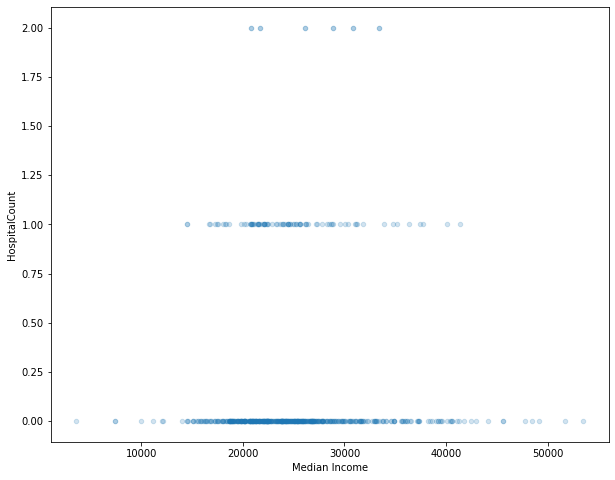

In [77]:
pltdata.plot(kind = 'scatter', x = 'Median Income',y = 'HospitalCount', figsize = (10,8), alpha = .2)

C:\Users\msflo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


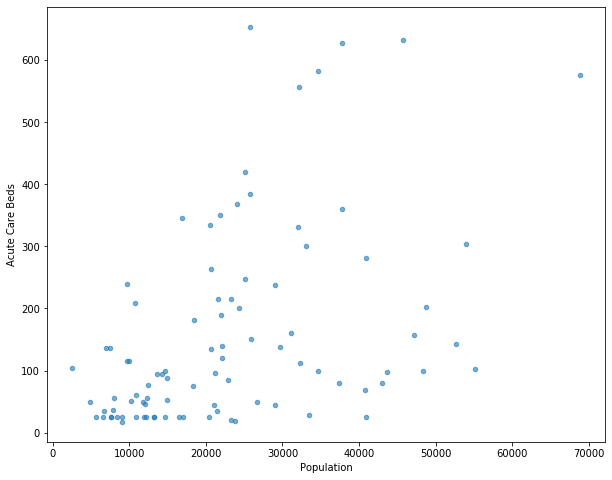

In [106]:

pltdata['BedsFilter'] = pltdata['Acute Care Beds'] == 0 # = pltdata['Acute Care Beds'].astype(int)
bedsdata = pltdata.loc[pltdata['BedsFilter']== False]
bedsdata['Acute Care Beds'] = bedsdata['Acute Care Beds'].astype(float)
bedsdata.plot(kind = 'scatter', x = 'Population',y = 'Acute Care Beds', figsize = (10,8), alpha = .6)
